In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
offset = 400
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['axes.linewidth']=2
rcParams['text.usetex']=True#True
path = "/home/jalil/Projects2023/TDNEGF/TDNEGF/data/"

In [3]:
def rectangle(v, a):
        profile = []
        for i in range(1100):
                if i>offset and i<(offset+a):
                        profile.append([v, -v])
                else: profile.append([0.0, 0.0])
        np.savetxt("vtd.txt", np.array(profile))
        return np.array(profile)
def delayBias(v, a):
        profile = []
        for i in range(1000):
                if  i>a/0.1:
                        profile.append([v/2, -v/2])
                else: profile.append([1e-10, 1e-10])
        np.savetxt("vtd.txt", np.array(profile))
        return np.array(profile)
def triangle(v, a):
    profile = []
    for i in range(400):
        if i>offset and i<(offset+a):
            h = 1-2*abs(i-offset-a/2)/a
            profile.append([v*h, 0.0])
        else: profile.append([0.0, 0.0])
    np.savetxt("vtd.txt", np.array(profile))
    return np.array(profile)
def leviton(v, a):
    profile = []
    for i in range(1100):
        ##if i<(30*a):
        h = 2*0.658212*a/((i-20*a)*(i-20*a)+a*a)
        profile.append([v*h, -v*h])
        ##else: profile.append([0.0, 0.0])
    np.savetxt("vtd.txt", np.array(profile))
    return np.array(profile)
def beam(v, a):
        profile = []
        for i in range(4000):
                profile.append([v, 0.0])
        np.savetxt("vtd.txt", np.array(profile))
        return np.array(profile)
def smBeam(v, a):
        profile = []
        for i in range(4000):
                profile.append([np.tanh((i-6*a)/(2.5*a))+1, 0.0])
        np.savetxt("vtd.txt", v*np.array(profile))
        return v*np.array(profile)
def smBias(v, a):
        profile = []
        for i in range(1100):
                profile.append([0.5*np.tanh((i-6*a)/(2.5*a))+0.5, -0.5*np.tanh((i-6*a)/(2.5*a))-0.5])
        np.savetxt("vtd.txt", v*0.5*np.array(profile))
        return v*0.5*np.array(profile)

In [4]:
#funcDir = {"rect":rectangle, "tri":triangle, "levi":leviton, "beam":beam, "smBeam":smBeam, "smBias":smBias, "delayBias":delayBias}
#funcDir[sys.argv[1]](float(sys.argv[2]), float(sys.argv[3]))

#50/0.1

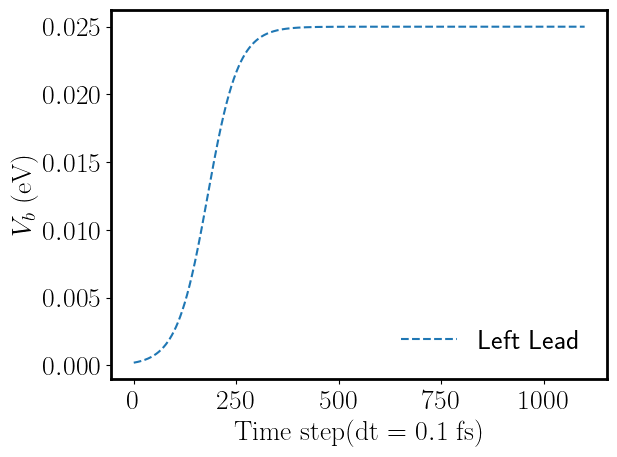

In [39]:
#plt.plot(rectangle(1,200)[:,0])
#plt.plot(delayBias(10,10))
#plt.plot(triangle(10,10))
#plt.plot(leviton(500,90)) ##### first index is the height and the second index is the lenght
#plt.plot(beam(50,10))
#plt.plot(smBeam(100,100))
plt.ylabel(r"$V_b\ \rm{(eV)}$",fontsize=20)
plt.xlabel(r"$\rm{Time\ step (dt=0.1\ fs)}$",fontsize=20)
#plt.plot(smBias(.2,300)[:,0])
plt.plot(-smBias(.05,30)[:,1],ls = "--")
#plt.plot(leviton(.5,20)[:,0])
##plt.plot(-leviton(.5,20)[:,:],ls='--')
##plt.plot(-rectangle(.03,200)[:,:],ls='--')
#plt.plot(leviton(0.02,100))
# plt.plot(leviton(1.0,200))
plt.tick_params(labelsize=20)
plt.legend(["Left Lead","Right Lead"], frameon =False,fontsize=20)
#plt.ylim([-1e-4,1e-4])

In [38]:
##### Then we can use three different frequencies 
### With the parameters of the paper we have
hbar = 0.658211928e0 # (eV*fs)
E_g = 2.28#2.0#4.0##2.28 # in EV or units of the Hamiltonian
### The energy is 2.28
Omega_0 = E_g/(hbar)*0.5#1.2
#Omega_1 = E_g/(hbar)*0.1
#Omega_2 = E_g/(hbar)*0.6
# Omega_3 = E_g/(hbar)*0.8
# Omega_4 = E_g/(hbar)*1.0
# Omega_5 = E_g/(hbar)*1.2

### Ahora hbarOmega = 2.28
### y Omega esta en unidad 1/fs

#### Pulse of light
# Parameters 
A_max = 1#0.5
sigma = 25
t_p = 4*sigma
#Omega_0 = Omega_3
ts = np.arange(0,8*sigma,0.1)#np.linspace(0,100,500)
def A(t,Omega_0=Omega_0):
    return A_max*np.exp(-(t-t_p)**2/(2*sigma^2))*np.sin(Omega_0*t)
    
As_0 = [A(t,Omega_0=Omega_0) for t in ts ]     
As_1 = [A(t,Omega_0=Omega_1) for t in ts ] 
As_2 = [A(t,Omega_0=Omega_2) for t in ts ] 
# As_3 = [A(t,Omega_0=Omega_3) for t in ts ] 
# As_4 = [A(t,Omega_0=Omega_4) for t in ts ] 
# As_5 = [A(t,Omega_0=Omega_5) for t in ts ] 


In [40]:
np.savetxt("pulse_05_gap.txt",As_0 )## test_3 0.01
#np.savetxt("pulse_test_1.txt",As_1 )## test_4 0.2
#np.savetxt("pulse_test_2.txt",As_2 )## test 0.1
#np.savetxt("pulse_test_3.txt",As_3 )
#np.savetxt("pulse_test_4.txt",As_4 ) ## test_5 0.1
#np.savetxt("pulse_test_5.txt",As_5 )## test_2 0.01


In [35]:
(0.1/hbar)*(2*np.pi/20)**2

0.014994569349538373

In [36]:
0.2*3/2

0.30000000000000004

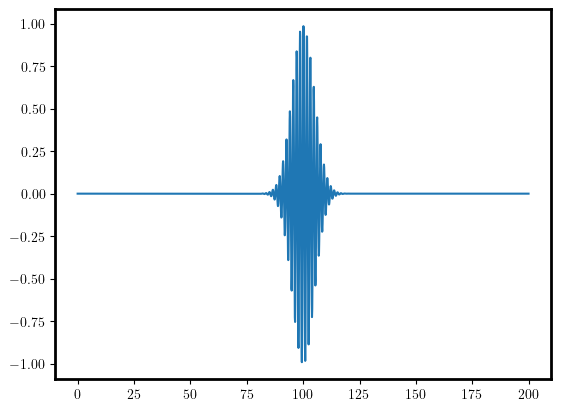

In [37]:
plt.plot(ts,As_0)
# plt.plot(ts,As_2)
# plt.plot(ts,As_3)
#plt.xlim([20,80])